In [6]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [39]:
start_date = '2019-01-01'
end_date = '2022-01-01'

In [40]:
def RSIcalc(asset): #names
    df = yf.download(asset,start=start_date, end = end_date)
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['Price Change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['Price Change'].apply(lambda x: x if x>0 else 0)
    df['Downmove'] = df['Price Change'].apply(lambda x: abs(x) if x<0 else 0)
    df['Avg Up'] = df["Upmove"].ewm(span=19).mean()
    df['Avg Down'] = df["Downmove"].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = (df['Avg Up']/df['Avg Down'])
    df['RSI']= df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI']<50), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI']>50), 'Buy'] = 'No'
    return df

In [41]:
stock = 'TSLA'

In [71]:
df = pd.DataFrame()
df = RSIcalc(stock)
df.query('Close > MA200 & RSI < 50')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,Price Change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2019-11-26,22.351334,22.366667,21.806667,21.927999,21.927999,119211000,17.048927,-0.022061,0.000000,0.022061,0.009969,0.010313,0.966709,49.153626,Yes
2019-11-29,22.073999,22.084000,21.833332,21.996000,21.996000,36984000,17.065357,-0.004075,0.000000,0.004075,0.008724,0.008761,0.995765,49.893911,Yes
2019-12-05,22.188667,22.294666,21.816668,22.024668,22.024668,55869000,17.107743,-0.007987,0.000000,0.007987,0.007135,0.007395,0.964750,49.102949,Yes
2020-02-27,48.666668,49.318001,44.599998,45.266666,45.266666,364158000,22.786057,-0.128146,0.000000,0.128146,0.020398,0.029836,0.683677,40.606191,Yes
2020-02-28,41.980000,46.034668,40.768002,44.532665,44.532665,363343500,22.931283,-0.016215,0.000000,0.016215,0.018359,0.028474,0.644744,39.200273,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-15,317.736664,326.250000,309.416656,325.329987,325.329987,75169200,254.155184,0.018237,0.018237,0.000000,0.011516,0.017241,0.667915,40.044918,Yes
2021-12-16,331.500000,331.660004,307.283325,308.973328,308.973328,82771500,254.664317,-0.050277,0.000000,0.050277,0.010364,0.020545,0.504464,33.531145,Yes
2021-12-17,304.923340,320.220001,303.013336,310.856659,310.856659,100437300,255.222017,0.006095,0.006095,0.000000,0.009937,0.018490,0.537430,34.956368,Yes


In [57]:
def getSignals(df):
    Buying_dates = []
    Selling_dates =[]
    
    for i in range(len(df)):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 60:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j==10:
                    Selling_dates.append(df.iloc[i+j+1].name)
            
                    
    return Buying_dates, Selling_dates    

In [58]:
frame = RSIcalc(stock)
Buy, Sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


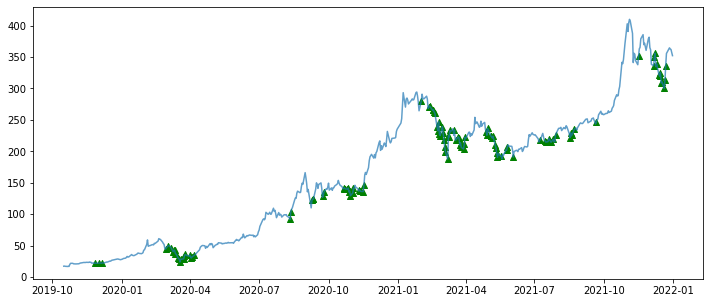

In [59]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[Buy].index , frame.loc[Buy]['Adj Close'], marker='^',c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

In [60]:
Profits = (frame.loc[Sell].Open.values - frame.loc[Buy].Open.values)/(frame.loc[Buy].Open.values)

In [61]:
Profits

array([ 6.26963378e-02,  6.82453886e-02,  5.03881682e-02, -5.51055653e-02,
       -3.39903826e-01, -3.64927541e-01, -2.83767458e-01, -2.76193112e-01,
       -1.48313069e-01, -5.76701309e-02, -1.51260499e-01,  8.68158087e-02,
        1.39178713e-01,  2.95629806e-01,  1.62711116e-01,  1.78966810e-01,
        1.41839485e-01,  1.64145328e-02,  1.77376567e-01,  2.26867337e-01,
        1.58312105e-01,  1.54460084e-01,  1.54011490e-01,  9.59183829e-02,
        2.33510945e-01,  1.38940007e-01,  1.51673080e-01,  1.58301229e-01,
        7.09584325e-02,  1.87366892e-02, -3.08201150e-02,  3.38043468e-02,
        6.77063831e-02, -8.66052268e-03, -7.19927053e-05,  1.24158735e-02,
        9.70753750e-03,  3.78934226e-02,  1.23105509e-01,  7.65998178e-02,
        8.02312277e-02,  9.12741897e-02,  9.63979138e-02, -2.56861755e-02,
        7.70364522e-02, -1.38397901e-01, -1.38719027e-01, -1.21907059e-01,
       -1.16931246e-01, -1.60199707e-01, -2.12503167e-01, -2.12538021e-01,
       -8.14794837e-02, -

In [62]:
Comisiones = 0.0025

In [63]:
dfr = pd.DataFrame()
dfr['Rendimientos'] = Profits
dfr['Utilidad'] = dfr['Rendimientos']-Comisiones

capital = 1000000
Monto = [1000000]



for i in range(len(dfr)):
    valor = Monto[-1]*(1+dfr['Rendimientos'][i])
    Monto.append(valor)
    
del Monto[0]
    
dfr['Monto'] = np.round(Monto,3)
dfr

,Rendimientos,Utilidad,Monto
0,0.062696,0.060196,1062696.338
1,0.068245,0.065745,1135220.462
2,0.050388,0.047888,1192422.142
3,-0.055106,-0.057606,1126713.046
4,-0.339904,-0.342404,743738.971
...,...,...,...
111,0.079608,0.077108,2110471.942
112,0.173705,0.171205,2477071.235
113,0.178950,0.176450,2920343.755
114,0.171017,0.168517,3419771.318


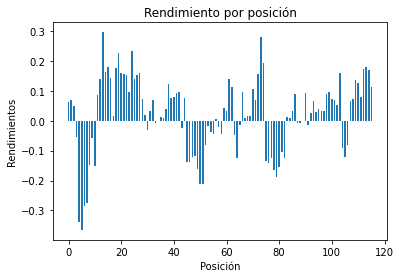

In [64]:
plt.bar(dfr.index, dfr.Rendimientos,width=0.6)
plt.xlabel("Posición")
plt.ylabel("Rendimientos")
plt.title("Rendimiento por posición")
plt.show()

In [65]:
wins = [i for i in Profits if i > 0]

In [66]:
len(wins)/len(Profits)

0.6379310344827587

In [67]:
impuestos = 0.1
ultimo = dfr[['Monto']].iloc[-1]
ultimo = ultimo * (1-impuestos)
np.round(ultimo,3)

Monto    3422048.662
Name: 115, dtype: float64

In [68]:
(ultimo - capital) / capital

Monto    2.422049
Name: 115, dtype: float64

## VARIOS ACTIVOS

In [70]:
tickers = ['TSLA', 'AAPL', ' GOOG', 'AMZN', 'XOM', 'TQQQ', 'VOO']

matrixsignals = []
matrixprofits = []

for i in range(len(tickers)):
    frame = RSIcalc(tickers[i])
    buy,sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy] / frame.loc[sell].Open.values)
    matrixsignals.append(Profits)

[*********************100%***********************]  1 of 1 completed


ValueError: Unable to coerce to Series, length must be 15: given 116